# Initialization

In [1]:
import pandas as pd
import numpy as np

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt


# Import the data

In [2]:
train = pd.read_csv('../data/mnist-in-csv/mnist_train.csv.zip', compression='zip')
test = pd.read_csv('../data/mnist-in-csv/mnist_test.csv.zip', compression='zip')


# Preprocess the data

Data as numpy array.

In [3]:
X_train=train.drop('label', axis=1).values
y_train=train.label.values
X_test=test.drop('label', axis=1).values
y_test=test.label.values

In [4]:
class_names = ['0', '1', '2', '3', '4', 
               '5', '6', '7', '8', '9']

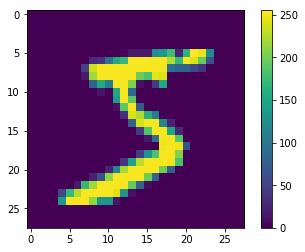

In [5]:
plt.figure()
plt.imshow(X_train[0].reshape(28, 28))
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
y_train[0]

5

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0


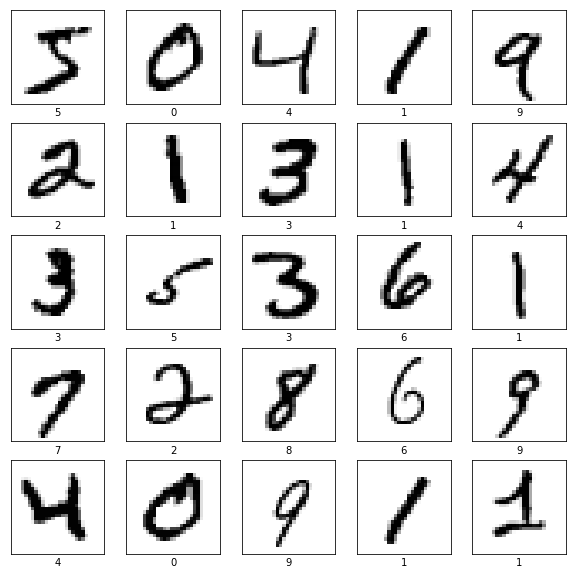

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

# Build the model

## Setup the layers

In [9]:
model = keras.Sequential([
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

## Compile the model

In [10]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Instructions for updating:
Colocations handled automatically by placer.


# Train the model

In [11]:
model.fit(X_train, y_train, epochs=2)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/2
60000/60000 [==============================] - 9s 156us/sample - loss: 0.3129 - acc: 0.9064
Epoch 2/2
60000/60000 [==============================] - 8s 139us/sample - loss: 0.1507 - acc: 0.9543


# Evaluate accuracy

In [12]:
print("Generating test predictions...")
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)


Generating test predictions...
10000/10000 [==============================] - 0s 35us/sample - loss: 0.1014 - acc: 0.9701
Test accuracy: 0.9701


# Make predictions

In [13]:
predictions = model.predict(X_test)
predictions[0]

array([2.3177591e-07, 2.8277882e-06, 7.6109915e-05, 1.4499687e-03,
       3.2692000e-09, 3.2331027e-06, 3.3457439e-09, 9.9842441e-01,
       1.4681682e-06, 4.1867057e-05], dtype=float32)

In [14]:
np.argmax(predictions[0])

7

In [15]:
y_test[0]

7

In [16]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777") # color grey
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    """
    print("predicted_label:", predicted_label)
    print("true_label:", true_label)
    print("thisplot[predicted_label]:", thisplot[predicted_label])
    print("thisplot[true_label]:", thisplot[true_label])
    """

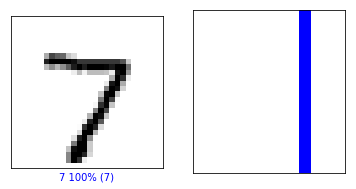

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  y_test)
plt.show()

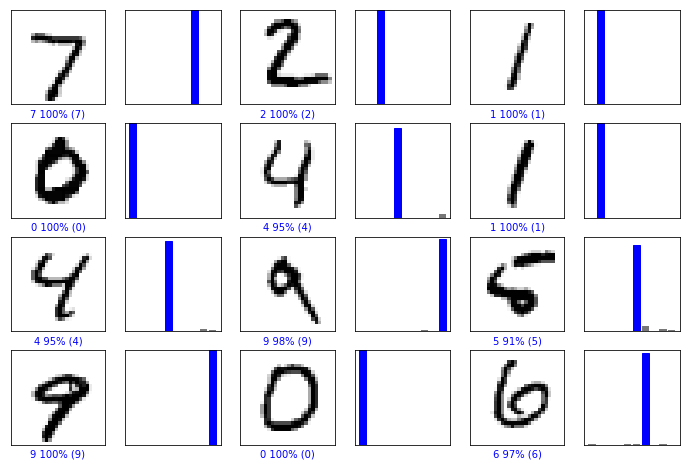

In [18]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 4
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, y_test)
plt.show()

In [19]:
def check_single(i, X_test, y_test):
    img = X_test[i]
    # Add the image to a batch where it's the only member.
    img = (np.expand_dims(img, 0))
    predictions_single = model.predict(img)
    label=np.expand_dims(y_test[i], 0)
    """
    print(predictions_single)
    print(predictions_single[0])
    print(y_test[i])
    """
    plot_value_array(0, predictions_single, label)
    plt.xticks(range(10), class_names)
    plt.show()

    prediction_result = np.argmax(predictions_single[0])
    print(prediction_result)

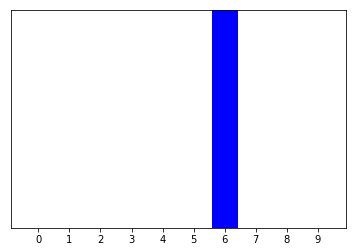

6


In [20]:
check_single(9999, X_test, y_test)


# Acknowledgements
https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/basic_classification.ipynb